In [13]:
import numpy as np
global np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
import wave
sys.path.append("../backend/")
%matplotlib inline
def load_wav(filepath, t_start = 0, t_end = sys.maxint) :
    """Load a wave file, which must be 22050Hz and 16bit and must be either
    mono or stereo. 
    Inputs:
        filepath: audio file
        t_start, t_end:  (optional) subrange of file to load (in seconds)
    Returns:
        a numpy floating-point array with a range of [-1, 1]
    """
    wf = wave.open(filepath)
    num_channels, sampwidth, fs, end, comptype, compname = wf.getparams()
    
    # for now, we will only accept 16 bit files at 22k
    assert(sampwidth == 2)
    assert(fs == 22050)

    # start frame, end frame, and duration in frames
    f_start = int(t_start * fs)
    f_end = min(int(t_end * fs), end)
    frames = f_end - f_start

    wf.setpos(f_start)
    raw_bytes = wf.readframes(frames)
    # convert raw data to numpy array, assuming int16 arrangement
    samples = np.fromstring(raw_bytes, dtype = np.int16)

    # convert from integer type to floating point, and scale to [-1, 1]
    samples = samples.astype(np.float)
    samples *= (1 / 32768.0)

    if num_channels == 1:
        return samples

    elif num_channels == 2:
        return 0.5 * (samples[0::2] + samples[1::2])

    else:
        raise('Can only handle mono or stereo wave files') 

# A note on todays work

There are A LOT of different types of filters. I mean tons. Many classes (like 6.003 etc) will cover maybe 4 of them in just enough depth that you know how a filter may work in general, but in the real work this isn't good enough. Today we are going to dive head first into the world of filters and try to understand what different types of filters exist, why you might want to use one filter over another, what are the tradeoffs of filters, and how do we choose a filter for our applications.

## High Pass, Low Pass, Band Pass and Band Stop
Probably the easier filters to be able to understand, these simply just augment the frequency content that is passed through them.

We are going to analyze how these filters functions under different light. First, allow us to consider how they function under audio.

In [ ]:
def demolowpass(cutoff):
    pass

def demohighpass(cutoff):
    pass

def demobandpass(cutoff):
    pass
    
def demobandstop(cutoff):
    pass


    

## Linear Filters
There is a class of filters called linear filters. We will talk about how these are constructed later in the class, but for now it is just worth knowing some of their operations.
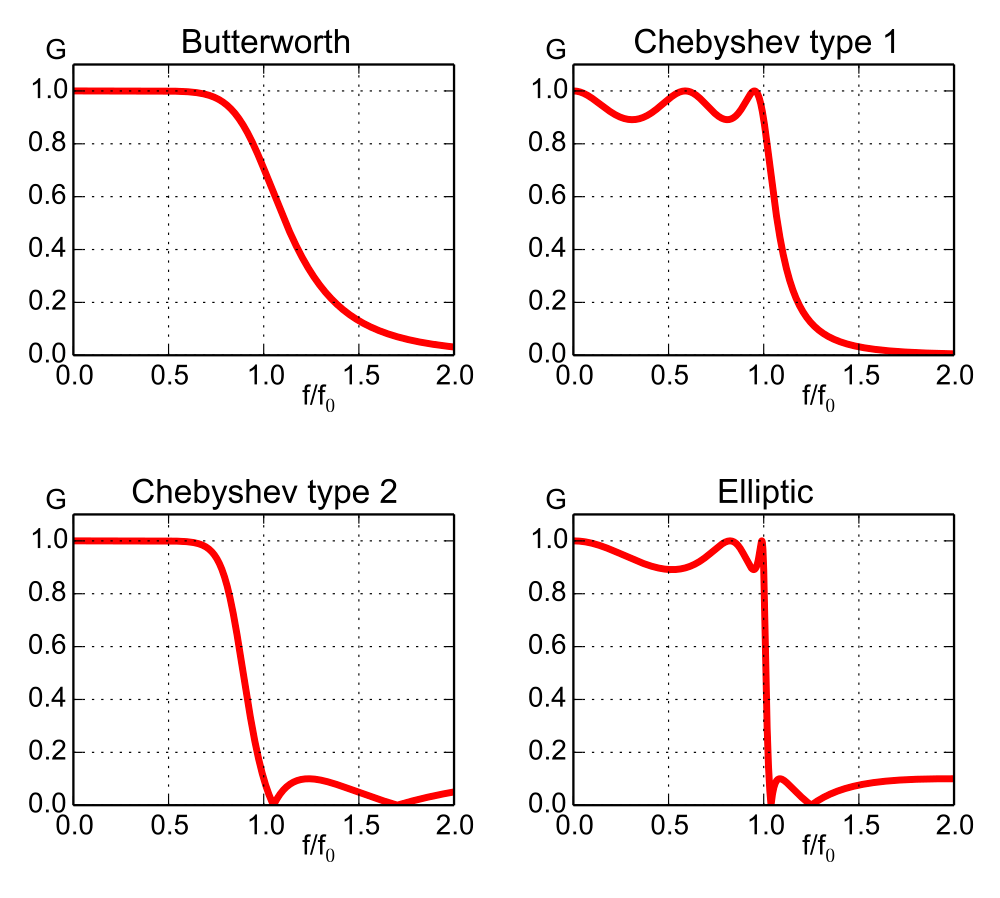

We will now talk about the butterworth filter. First, let's consider the two cases of audio and images.

In [ ]:
def demobutterworthaudio():
    pass

def demobutterworthimage():
    pass

We will now talk about a type 1 Chebyshev Filter.

In [1]:
def demochebyshev1audio():
    pass

def demochebyshev1image():
    pass

We will now talk about a type 2 Chebyshev Filter

In [ ]:
def demochevyshev2audio():
    pass

def demochevyshev2image():
    pass

And finally, we will talk about an elliptic filter

In [ ]:
def demoellipticaudio():
    pass

def demoellipticimage():
    pass

FIR Filtering

In [ ]:
def demoFIR():
    pass

Bessel Filter / Thiran Filter

Gaussian Filter

Comb Filter

Optimum L Filter

Linkwitz-Riley Filter

## Filtering with a kernel
When we are dealing with some kind of two dimensional data (in particular an image) sometimes we want to be able to filter for particular values. F

## Undoing filtering with a kernel
The act of deconvolution is very difficult in signal processing. If the kernel that you are using for convolution is rank-complete (it has as many linearly independent rows as their are rows) then deconvolution is as simple as just inverting the matrix and convolving again. 
However, in most cases deconvolution is not that easy. Let's look at what happens when we invert a 3x3 rank with rank one and try to take the convolution (not, the inverse for a non-rank complete matrix is not well defined, I am going with the moorse-penrose pseudoinverse matrix).

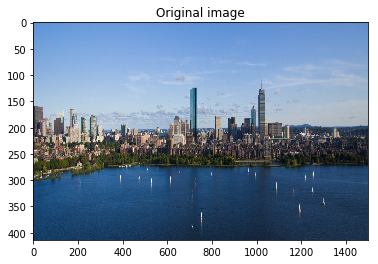

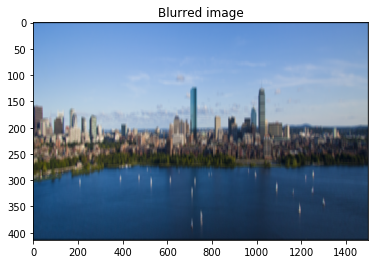

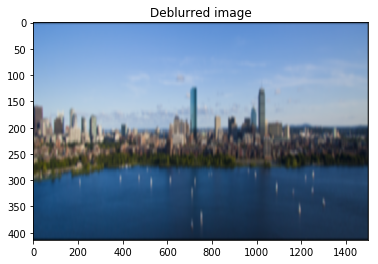

In [46]:
def deconvolutiondemo(image, kernel):
    blurredimage = np.zeros(boston.shape)
    plt.figure()
    plt.imshow(boston,aspect='auto')
    plt.title('Original image')
    plt.show()
    plt.figure()
    blurredimage[:,:,0] = sp.ndimage.convolve(boston[:,:,0],kernel,mode='constant',cval=0.0)
    blurredimage[:,:,1] = sp.ndimage.convolve(boston[:,:,1],kernel,mode='constant',cval=0.0)
    blurredimage[:,:,2] = sp.ndimage.convolve(boston[:,:,2],kernel,mode='constant',cval=0.0)
    blurredimage = blurredimage.astype(np.uint8)
    plt.imshow(blurredimage,aspect='auto')
    plt.title("Blurred image")
    plt.show()
    
    deblurredimage = np.zeros(boston.shape)
    inversekernel = np.linalg.pinv(kernel)
    inversekernel = inversekernel/np.sum(inversekernel)
    plt.figure()
    deblurredimage[:,:,0] = sp.ndimage.convolve(blurredimage[:,:,0],inversekernel,mode='constant',cval=0.0)
    deblurredimage[:,:,1] = sp.ndimage.convolve(blurredimage[:,:,1],inversekernel,mode='constant',cval=0.0)
    deblurredimage[:,:,2] = sp.ndimage.convolve(blurredimage[:,:,2],inversekernel,mode='constant',cval=0.0)
    deblurredimage = deblurredimage.astype(np.uint8)
    plt.imshow(deblurredimage,aspect='auto')
    plt.title("Deblurred image")
    plt.show()
    
    
boston = sp.misc.imread("./Photos/lounge_view.png")
kernel = np.ones((7,7))
normalizedkernel = kernel/np.sum(kernel)
deconvolutiondemo(boston,normalizedkernel)

???? What happened to our deblurring idea? If you sprinkle some print statements into the code you will actually find that what numpy things the inverse of the matrix is is infact the originally blurring matrix. This is because of inverse of a rank-deficient kernel is not well defined. 
So what can we do to deconvolve?

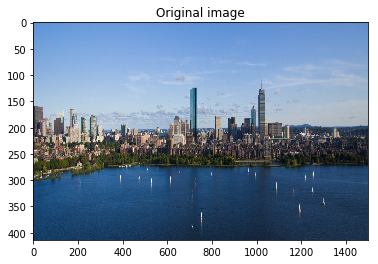

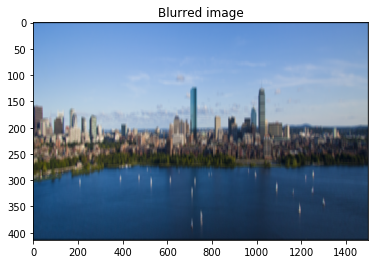

TODO: CREATE DECONVOLUTION ALGORITHM FOR TRYING TO FIGURE OUT WHAT THE BEST WAY TO INVERSE THIS PROCESS IS


In [55]:
boston = sp.misc.imread("./Photos/lounge_view.png")
kernel = np.ones((7,7))
normalizedkernel = kernel/np.sum(kernel)
blurredimage = np.zeros(boston.shape)
plt.figure()
plt.imshow(boston,aspect='auto')
plt.title('Original image')
plt.show()
plt.figure()
blurredimage[:,:,0] = sp.ndimage.convolve(boston[:,:,0],normalizedkernel,mode='constant',cval=0.0)
blurredimage[:,:,1] = sp.ndimage.convolve(boston[:,:,1],normalizedkernel,mode='constant',cval=0.0)
blurredimage[:,:,2] = sp.ndimage.convolve(boston[:,:,2],normalizedkernel,mode='constant',cval=0.0)
blurredimage = blurredimage.astype(np.uint8)
plt.imshow(blurredimage,aspect='auto')
plt.title("Blurred image")
plt.show()
returnableimage = np.zeros(boston.shape)
print "TODO: CREATE DECONVOLUTION ALGORITHM FOR TRYING TO FIGURE OUT WHAT THE BEST WAY TO INVERSE THIS PROCESS IS"

## Sidenote on blurring in photography
When we do blurring in photography there are many different ways that we can do it, but most all (except the bilateral filter listed below) are not edge preserving (edges get smeared over several pixels). We can attempt to deblur the image by finding the high frequency content of the image and then adding it back to the blurred image.

Wiener Filtering

Kalman Filtering

Partical Filter

## Bilateral Filter
Usually used in image processing, the bilateral filter is a way of bluring images while perserving edges of those images. I present an example of the filter below.
Information about the technical details can be found here:
https://en.wikipedia.org/wiki/Bilateral_filter

In [8]:
def bilateralfilter(image,kerneldimension,sigmar,sigmad):
    normalizationvalues = np.zeros((image.shape[0],image.shape[1],image.shape[2]))
    filteredimage = np.zeros((image.shape[0],image.shape[1],image.shape[2]))
    for width in range(image.shape[0]):
        for height in range(image.shape[1]):
            for channel in range(image.shape[2]):
                for x in range(-kerneldimension/2,kerneldimension/2):
                    for y in range(-kerneldimension/2,kerneldimension/2):
                        if(width+x >= 0 and width+x<image.shape[0] and height+y >= 0 and height+y < image.shape[1]):
                            normalizationvalues[width,height,channel] += np.exp((image[width+x,height+y,channel]-image[width,height,channel])**2/(2.*sigmar))*np.exp((x**2+y**2)/(2*sigmad)) 
    #Now that normalizedvalues are calculated we can calculate the filtered image
    for width in range(image.shape[0]):
        for height in range(image.shape[1]):
            for channel in range(image.shape[2]):
                for x in range(-kerneldimension/2,kerneldimension/2):
                    for y in range(-kerneldimension/2,kerneldimension/2):
                        if(width+x >= 0 and width+x<image.shape[0] and height+y >= 0 and height+y < image.shape[1]):
                            filteredimage[width,height,channel] += 1./normalizationvalues[width,height,channel] * image[width+x,height+y,channel]*np.exp((image[width+x,height+y,channel]-image[width,height,channel])**2/(2.*sigmar))*np.exp((x**2+y**2)/(2*sigmad))
    return filteredimage

def bilateralfilterdemo(kerneldimension):
    boston = sp.misc.imread("./Photos/lounge_view.png")
    plt.figure()
    plt.imshow(boston,aspect='auto')
    plt.title("Original image")
    plt.show()
    
    filteredimage = bilateralfilter(boston,8,5,5)
    plt.figure()
    plt.imshow(filteredimage,aspect='auto')
    plt.title("Bilateral filtered image")
    plt.show()
    
    
interact(bilateralfilterdemo,kerneldimension=(3,5));

interactive(children=(IntSlider(value=4, description=u'kerneldimension', max=5, min=3), Output()), _dom_classes=('widget-interact',))

Median Filter

In [4]:
def medianfilterdemo(wlen):
    signal = np.array([1,2,1,2,1,2,1,2,1,2,3,7,8,4,2,1,2,1,2,3,2,1,1])
    originalsignallength = len(signal)
    zeropaddedsignal = np.pad(signal,wlen,'constant',constant_values = 0)
    plotable = np.zeros(originalsignallength)
    for i in range(originalsignallength):
        plotable[i] = np.median(zeropaddedsignal[i:i+wlen])
    plt.figure()
    plt.plot(plotable)
    plt.show()
    
interact(medianfilterdemo,wlen=(3,9))
    

interactive(children=(IntSlider(value=6, description=u'wlen', max=9, min=3), Output()), _dom_classes=('widget-interact',))

<function __main__.medianfilterdemo>

What do you notice about the output of the median filter? In what applications might this is particularly useful? What do you think happens to noise from the median filter? What about delay of the signal?
ANSWER HERE